# Testing Hypothesis

## Intro

I am working with the marketing team for a large online company. Together, we have compiled a list of 9 hypothesis that potentially boost revenue. My goal is to test the hypotheses by launching an A/B test. My job is to analyze the results of the A/B tests.

The first dataframe is called data_1 - is has 5 columns. The columns are ['hypothesis'] , ['reach'] , ['impact'] , ['confidence'] , and ['effort'] .  

[hypothesis] column is a object datatype, it summarizes the marketing startegy in one sentence. there are 9 hypothesis total

[reach] column is int datatype. it describes the number of users that visited, based on a scale 1-10

[impact] column is int datatype. it describes the number of users that made an order, based on a scale 1-10

[confidnece] column is int datatype. it describes the belief(of the company/marketing team) that it will be succesful, based on a scale 1-10

[effort] column is int datatype. it describes the time, money, and resources it will take to profit, based on a scale 1-10

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import datetime as dt
from scipy import stats as st

## Part One

The task is to:

Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [2]:
#download dataset
#use sep=';' so data is read correctly
data_1 = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 0)

In [5]:
#column names lowercase
data_1.columns = [x.lower() for x in data_1.columns]
data_1

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


Impact, confidence, effort/ease (ICE) is one of the most popular ways of prioritizing problems. We can calculate in two ways. 

ICE = impact * confidence * ease OR
ICE = impact * confidence / effort 

Based on our dataframe, we are able to determine that impact * confidence / effort is the calculation we will choose.

My first task: Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
My second task: Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [6]:
#make ICE column in data_1
data_1['ICE'] = (data_1['impact'] * data_1['confidence']) / data_1['effort']
data_1
print(data_1[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                               hypothesis  \
8  Launch a promotion that gives users discounts on their birthdays                                                         
0  Add two new channels for attracting traffic. This will bring 30% more users                                              
7  Add a subscription form to all the main pages. This will help you compile a mailing list                                 
6  Show banners with current offers and sales on the main page. This will boost conversion                                  
2  Add product recommendation blocks to the store's site. This will increase conversion and average purchase size           
1  Launch your own delivery service. This will shorten delivery time                                                        
5  Add a customer review page. This will increase the number of orders                                                      


The most promising hypotheses are 8, 0, 7 based on the ICE framework

In [7]:
#make RICE column in data_1
data_1['RICE'] = (data_1['reach']*data_1['impact']*data_1['confidence']) / data_1['effort']

print(data_1[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                                               hypothesis  \
7  Add a subscription form to all the main pages. This will help you compile a mailing list                                 
2  Add product recommendation blocks to the store's site. This will increase conversion and average purchase size           
0  Add two new channels for attracting traffic. This will bring 30% more users                                              
6  Show banners with current offers and sales on the main page. This will boost conversion                                  
8  Launch a promotion that gives users discounts on their birthdays                                                         
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1  Launch your own delivery service. This will shorten delivery time                                                        


The most promising hypotheses are 7, 2, 0 based on the RICE framework.

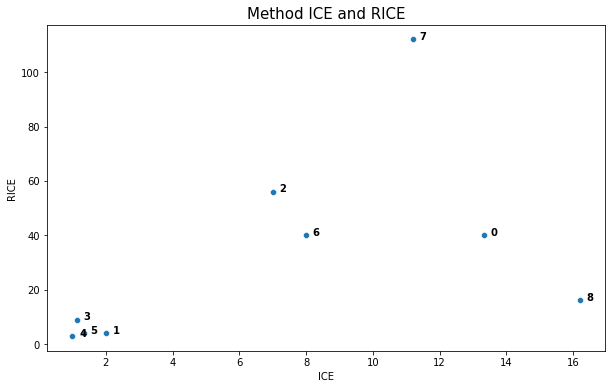

In [8]:
plt.figure(figsize=(10,6))
plt.title('Method ICE and RICE', size=15)
sns.scatterplot(x=data_1['ICE'], y=data_1['RICE'])
for line in range(0,data_1.shape[0]):
     plt.text(data_1.ICE[line]+0.2, 
              data_1.RICE[line], 
              data_1.index[line], 
              horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

The prioritzation changes with different frameowrks are applied. Notice 0 and 7 are both cosidered promising, but are in different positionsof priority. This is because hypothesis 7 has the highest reach (10), while hypothesis 0 has the highest impact. How do I determine which hypothesis is stronger? Note: the confidence level is the same for these hypothesis, and similar efforts. 

Hypothesis 7 has a reach(10) and impact(7) : this means it reaches a lot of users, and has an impact on many users. 


Hypothesis 0 has a reach(3) and impact(10) : this means it has a high impact, but reaches less users. 

In order to boost revenue, hypothesis 7 can be considered strongest

The graph shows how the hypothesis performed in both ICE and RICE method. For example, hypothesis 8 has a high performance in ICE (16) and a poor performance in RICE(20). What determines a high performance or low performance? The graph allows the anaylst to show the performace in both ICE and RICE, while being able to comapre 9 hypotheses at the same time. 

## Part Two

Analyze the A/B test:

1. Graph cumulative revenue by group. Make conclusions and conjectures.

2. Graph cumulative average order size by group. Make conclusions and conjectures.

3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

7. Plot a scatter chart of order prices. Make conclusions and conjectures.

8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

13. Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

In [9]:
#download dataframe
#download dataset
#use sep=';' so data is read correctly
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

### Data Prep

#### for orders 

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [11]:
#snakecase for column names
orders = orders.rename(
    columns={
        'transactionId': 'transaction_id',
        'visitorId': 'visitor_id',
        
    }
)
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [12]:
#change datatype for date
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
#group the data in orders dataframe to find the visitor ids in group A and group B
group_counter = orders.groupby('visitor_id')['group'].nunique()
#a damaged user = a user in both groups
damaged_users = group_counter[group_counter > 1].index
#damaged_users = group_counter[group_counter['group'] > 1]
print(len(damaged_users))


58


In [14]:
orders = orders[~orders['visitor_id'].isin(damaged_users)]

#### for visits

In [15]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

### TASK 1

Graph cumulative revenue by group. Make conclusions and conjectures.

In [17]:
orders['group'].value_counts().sort_values(ascending=False)

B    548
A    468
Name: group, dtype: int64

In [18]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [19]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [20]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [21]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

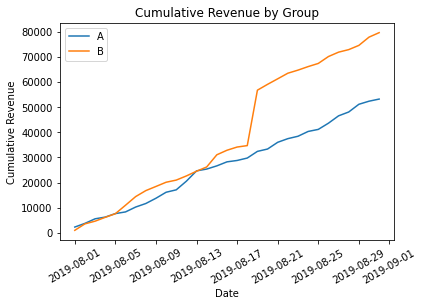

In [22]:
# DataFrame with cumulative ORDERS and cumulative REVENUE by DAY, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative ORDERS and cumulative REVENUE by DAY, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Cumulative Revenue by Group')
plt.xlabel("Date")
plt.ylabel("Cumulative Revenue")
plt.xticks(rotation=30)
plt.legend()

Conjecture: The data frame is over 30 days. Around the 15 day, I see group B has a higher cumulative revenue by group compared to group A. This means the daily combined revenue of Group B  is higher than group A

### TASK 2

Graph cumulative average rev per order by group. Make conclusions and conjectures.

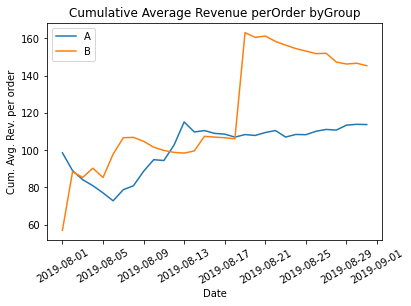

In [23]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

plt.title('Cumulative Average Revenue perOrder byGroup')
plt.xlabel("Date")
plt.ylabel("Cum. Avg. Rev. per order")
plt.xticks(rotation=30)
plt.legend()

Conjecture: Group B has higher cumulative average rev per order by group compared to group A. This means members in Group B spent more money on average per purchase.

### TASK 3 

Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjecture

In [24]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


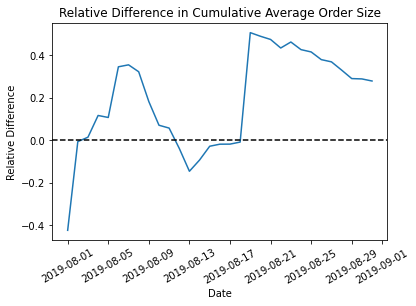

In [25]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis

plt.title('Relative Difference in Cumulative Average Order Size')
plt.xlabel("Date")
plt.ylabel("Relative Difference")
plt.xticks(rotation=30)
plt.axhline(y=0, color='black', linestyle='--') 

Conjecture: The closer point is to the dotted line (at 0.0), the closer Group A and Group B are in average order size. I notice that point with low relative difference are near the middle of the month. After that, a large spike in relative difference occurs. 

### TASK 4 

Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.


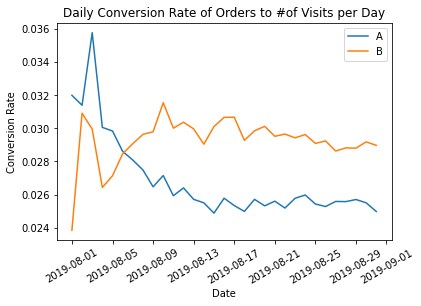

In [26]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('Daily Conversion Rate of Orders to #of Visits per Day')
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=30)
plt.legend()

Conjecture: The chart is telling me the conversation rate of  ratio of orders to the number of visits for each day.  The conversation rate for group b is higher than group a. In the beginning, they both had a sharp peak and a sharp decline. It was good to see group b have a second peak, then maintained a conversoin rate over 0.028 for the entire month. Group a conversion rate never had a second peak, never reached 0.028(after the first peak). 

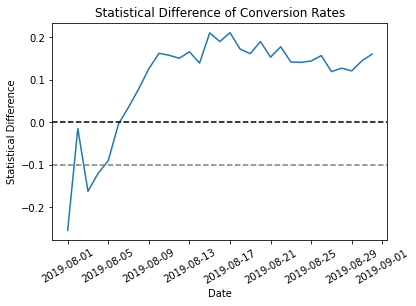

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.title('Statistical Difference of Conversion Rates')
plt.xlabel("Date")
plt.ylabel("Statistical Difference")
plt.xticks(rotation=30)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')




This is  the statistical difference for conversion rate as the ratio of orders to the number of visits for each day. The graph supports the previous observation. group b does have a better conversion rate, and that conversion rate is signficantly different than group a

### TASK 5

Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [28]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [29]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))


     visitor_id  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


In [30]:
ordersByUsers['visitor_id'].describe()

count    9.730000e+02
mean     2.118387e+09
std      1.221446e+09
min      5.114589e+06
25%      1.028756e+09
50%      2.138109e+09
75%      3.141508e+09
max      4.283872e+09
Name: visitor_id, dtype: float64

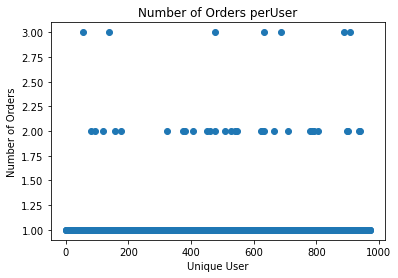

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))

 
plt.title('Number of Orders perUser')
plt.xlabel("Unique User")
plt.ylabel("Number of Orders")

plt.scatter(x_values, ordersByUsers['orders'])

This helps me see how many purchases users typically make. Majority of users made one purchase, that is why so many points are plotted on the 1.00 line. Enough users made two purchases for me to consider it normal, and a handful of three purchases implies its not common. I would consider any user who has more than three orders to be an anaomaly.

### Task 6

Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly

In [32]:
print(np.percentile(ordersByUsers['orders'], [95, 97.5, 99])) 

[1. 2. 2.]


In [33]:
ordersByUsers['orders'].value_counts().sort_values(ascending=False)

1    937
2    29 
3    7  
Name: orders, dtype: int64

I removed the code that deletes duplicates for user id's - therefore I am able to see anaomlies in the data. I am looking at numbers of orders per user. By finding the 95(2 orders per user), 97.5(3 orders per user), and 99 (4 orders per user)percentile. This suggests that majority of users had 1 order. I confirmed these reults by finding the value counts of the orders and sort values - 937 users has 1 order

### Task 7

In this task I made a scatterplot for the revenue for orders. I want to detect any possible abnormal values. 

Plot a scatter chart of order prices. Make conclusions and conjectures.

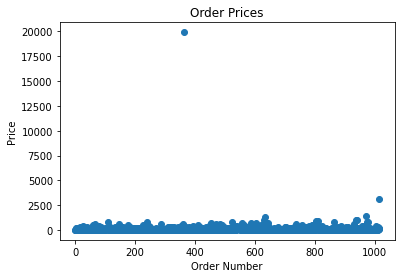

In [44]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.title('Order Prices')
plt.xlabel("Order Number")
plt.ylabel("Price")
plt.scatter(x_values, orders['revenue'])

### Task 8

Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [35]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[280.8   414.275 830.3  ]


In [36]:
orders['revenue'].describe()

count    1016.000000 
mean     130.770866  
std      648.079810  
min      5.000000    
25%      20.775000   
50%      50.100000   
75%      126.950000  
max      19920.400000
Name: revenue, dtype: float64

I detect outliers. The difference in the 95th to 99th is significant. Another observation is the mean order price is the same as the 75th. When the mean is this much higher than the 50th (order price = 50) , it means the anaomly values are shifting the data to the right 

### Task 9

Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.


The null hypothesis (H0) = the conversion rate of group a and group b are NOT signigicantly different 

The alternative hypothesis (H1) = the conversion rate of group a is significantly different than group b



I chose a significance level of 0.05

Reject H0 if critical level(p-value) < 0.05

In [37]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))



0.011
0.160


First row of output represents the p-value.
Second row of output represents the relative gain. 

0.011 < 0.05 = reject H0

Alt hypoth: the conversion rate of group a is significantly different than group b


Also, conversion rate of group b is greater than group a by 16%

### Task 10

Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

The null hypothesis (H0) = the difference in average order size of group a and group b are NOT signigicantly different

The alternative hypothesis (H1) = the difference in average order size of group a is significantly different than group b

I chose a significance level of 0.05

Reject H0 if critical level(p-value) < 0.05

In [38]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


0.862
0.278


First row of output represents the p-value. Second row of output represents the relative gain.

0.862 > 0.05 = accept H0


There's no reason to reject the null hypothesis and conclude that average order size differs between the groups. 

Also, average order size of group b is greater than group a by 27.8%

### Task 11

Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

SAME AS TASK 9 BUT WITH FILTERED DATA

The null hypothesis (H0) = the conversion rate of group a and group b are NOT signigicantly different

The alternative hypothesis (H1) = the conversion rate of group a is significantly different than group b

I chose a significance level of 0.05

Reject H0 if critical level(p-value) < 0.05

In [39]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 
np.percentile(orders['revenue'], 99)]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()


In [40]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [41]:
#np.percentile(ordersByUsers['orders'], 99)
#np.percentile(orders['revenue'], 99)

print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.006
0.202


First I compare the unfiltered data output, 0.011 from Task 9, to the output in Task 11 .006. 

Both are lower than 0.05, therefore the hypothesis (H1) I accept does not change. 

Regardless if the data is filtered, group a and group b are significantly different in conversion rate. 

NOTE: after the data is filtered there is a 4% increase for group b in conversion rate. 

### Task 12

Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

SAME AS TASK 10 BUT WITH FILTERED DATA

The null hypothesis (H0) = the difference in average order size of group a and group b are NOT signigicantly different

The alternative hypothesis (H1) = the difference in average order size of group a is significantly different than group b

I chose a significance level of 0.05

Reject H0 if critical level(p-value) < 0.05

In [42]:
print('{0:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


0.861
-0.029


(In task 10 : 0.862, 27.8%)

First I compare the unfiltered data to filtered to see if it impacts my choice in hypothesis. 

They are nearly the same, therefore the hypothesis (H0) I accept in Task 10 does not change.

Regardless if the data is filtered, group a and group b are NOT significantly different in average order size.

NOTE: The relative gain decresed significantly when the data is filtered, now the difference between the segments is -2.9 %

First I need to consider:

1. Was the test split correctly? I have users in the data who fall into both groups A and B. I removed them from the dataset, so as not to distort the test results.


2. Is it significantly different, or is this just a statistical fluctuation? I graphed the relative difference for Task 2. The graph shows significant spiked. There are 3 points where the relative difference was at 0 - all before the 19th. After the 19th, the data shows high relative difference between the groups
    
3. Do I detect peeking? I detect peaking on the 18th day!

4. Was test too short/long?  I calculated and plotted the conversion rates(with ratio of "orders : number of visits for each day". The cumlatives metrics indicate flucuations in the data. The graph in this task allows me to determine if the test is long enough. It shows when the data begins to stablize. I believe 30 days is sufficeient, and will test this in future tasks.

5. How did I analyze anomilies? I scatterplot "number of orders per user". The graph suggests that most users make 1 order, some made 2 orders, and only a handful made 3. I conclude that anything above three purchases is an anomaly.




Is there a statistically significant difference in conversion between the groups, according to both the raw and the filtered data?

Regardless if the data is filtered:
- group a and group b are significantly different in conversion rate
- group a and group b are NOT significantly different in average order size

Make a decision based on the test results: 

STOP THE TEST, delcare group b the leader. 


## Recap : Part One

In part one I saw nine different marketing-strategy hypotheses. I performed ICE and RICE framework to priortize the hypotheses.  

When looking at impact, confidence, and effort alone - the top three are:


8  Launch a promotion that gives users discounts on their birthdays                                                         
0  Add two new channels for attracting traffic. This will bring 30% more users                                              
7  Add a subscription form to all the main pages. This will help you compile a mailing list



When looking at reach, impact, confidence, and effort the top three changed:

7  Add a subscription form to all the main pages. This will help you compile a mailing list                                 
2  Add product recommendation blocks to the store's site. This will increase conversion and average purchase size           
0  Add two new channels for attracting traffic. This will bring 30% more users


ICE and RICE prioritization provides guidance toward which marketing strategy the company will invest in:

Hypothesis 8("Launch a promotion that gives users discounts on their birthdays")has a high ICE score, but not RICE. A user might be highly impacted on their birthday, but that's only one day of the year. 

Hypothesis 2("Add product recommendation blocks to the store's site. This will increase conversion and average purchase size") has a higher RICE score than ICE. The user is reached by a recommendation box everytime the access the website, however the impact score suggests users don't respond to this strategy

Hypothesis 0("Add two new channels for attracting traffic. This will bring 30% more users") and 7("Add a subscription form to all the main pages. This will help you compile a mailing list") are in the top 3 for RICE and ICE scores. Making a scatterplot helps visualize which performs better. 

The scatterplot shows that hypothesis 7 is the highest performing hypothesis

## Recap : Part Two

In Task 1 I was able to detect outliers in the data when calculating "cumulative revenue by group". On the 18th day, group B shows peaking in the data.

In Task 2 I visually found GROUP B performs higher than GROUP A in "cumulative average revenue per order by group". After the peak on the 18th, GROUP B still performed significantly higher than GORUP A.

In Task 3 I graphed the relative difference for Task 2. The graph shows significant spiked. There are 3 points where the relative difference was at 0 - all before the 19th. After the 19th, the data shows high relative difference between the groups.

In Task 4 I calculated and plotted the conversion rates(with ratio of "orders : number of visits for each day". The cumlatives metrics indicate flucuations in the data. The graph in this task allows me to determine if the test is long enough. It shows when the data begins to stablize. I believe 30 days is sufficeient, and will test this in future tasks. 

In Task 5 I scatterplot "number of orders per user". The graph suggests that most users make 1 order, some made 2 orders, and only a handful made 3. I conclude that anything above three purchases is an anomaly. 

In Task 6 I calculated 95 and 99 percentiles for "number of orders per user":
95% of users ordered - 1.0 order
99% of users ordered - 1.0 or 2.0 orders

This means only 1% of users ordered > 2.0 orders

and less than 5% of users orders > 1.0 orders


I displayed how many users ordered:

937 users had 1 order
    
29 users had 2 orders
    
7 users had 3 orders

In Task 7 I made a scatterplot for order prices and found that majority of orders are less than 500. The graph is the foundation of my conclusion. I used print "value_counts on revenue" to get a better understanding of order prices. It seems a typical amount order price is 100.

In Task 8 I found the 95 and 99 percentile for order prices to make the conclusion that:


95% of orders spend 414.25 or less

99% of orders spend 830.30 or less

1% of orders are greater than 830.30

In Task 9, using raw data, I formulated a null hypothesis and the alternative hypothesis for the conversion rate. I found the conversion rate of group a is significantly different than group b.

Then I calculated the difference in conversion between the groups, also using raw data. Conversion rate of group b is greater than group a by 16

In Task 10 I used raw data to find the statistical significance of the difference in average order size. 0.862 is much higher than 0.05, so the difference in average order size of group a and group b are NOT signigicantly different.

Also, average order size of group b is greater than group a by 27.8% with raw data

In Task 11 I did the same calculations as Task 9, with filtered data. I analyzed if the filtered data had an impact on the difference in conversion between the groups. Regardless if the data is filtered, my choice of hypothesis does not change. Group a and group b are significantly different in conversion rate. After the data is filtered there is a 4% increase for group b in conversion rate.

In Task 12 I found group a and group b are not significantly different, even if the data is filterted. My hypothesis for average order size stat significance does not change: group a and group b are NOT significantly different in average order size.

